In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Task 1

In [31]:
def task1(imname):
    # Load the image
    image_path = f'images//{imname}'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    # Define the masks for line detection
    horizontal_mask = np.array([[-1, -1, -1],
                                [ 2,  2,  2],
                                [-1, -1, -1]])

    vertical_mask = np.array([[-1,  2, -1],
                            [-1,  2, -1],
                            [-1,  2, -1]])

    diag_45_mask = np.array([[-1, -1,  2],
                            [-1,  2, -1],
                            [ 2, -1, -1]])

    diag_neg45_mask = np.array([[ 2, -1, -1],
                                [-1,  2, -1],
                                [-1, -1,  2]])


    # Apply convolution using the masks
    horizontal_edges = cv2.filter2D(image, -1, horizontal_mask)
    vertical_edges = cv2.filter2D(image, -1, vertical_mask)
    diag_45_edges = cv2.filter2D(image, -1, diag_45_mask)
    diag_neg45_edges = cv2.filter2D(image, -1, diag_neg45_mask)
        


    # Display the results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title("Horizontal Lines")
    plt.imshow(horizontal_edges, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title("Vertical Lines")
    plt.imshow(vertical_edges, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title("Diagonal Lines (+45°)")
    plt.imshow(diag_45_edges, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title("Diagonal Lines (-45°)")
    plt.imshow(diag_neg45_edges, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


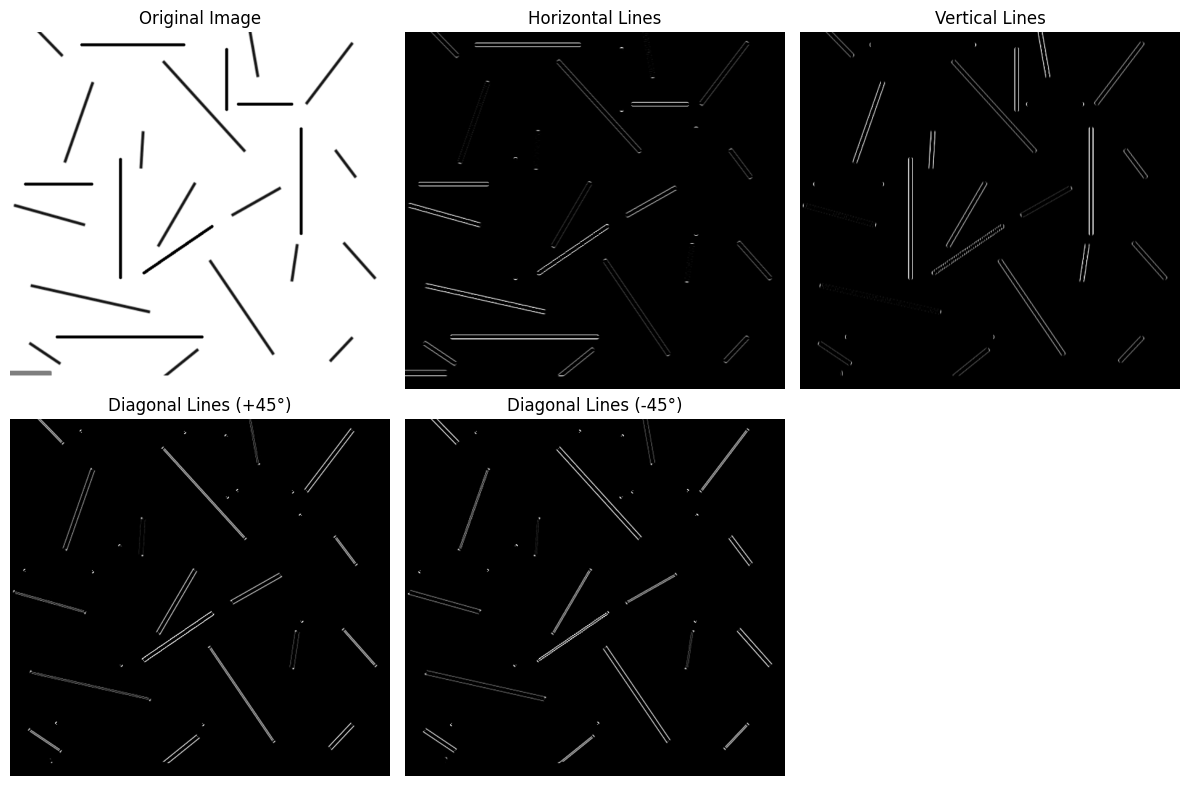

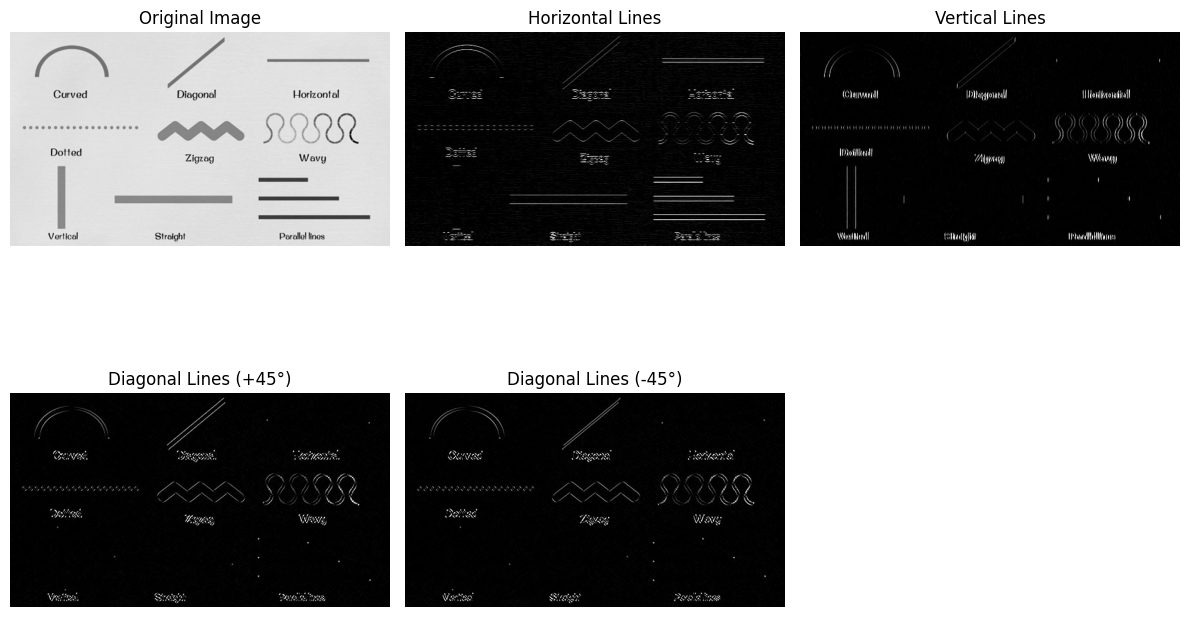

In [33]:
task1('image1.png')
task1('image2.png')

